In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/20/20,897,9977,2265,254,1571,2955,13477,529,116,1900
5/21/20,903,10116,2512,279,1640,3204,13657,534,116,1908
5/22/20,911,10267,2743,279,1725,3477,13989,544,116,1916
5/23/20,918,10577,3054,279,1819,3477,14422,550,116,1931


In [4]:
deaths.head()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0


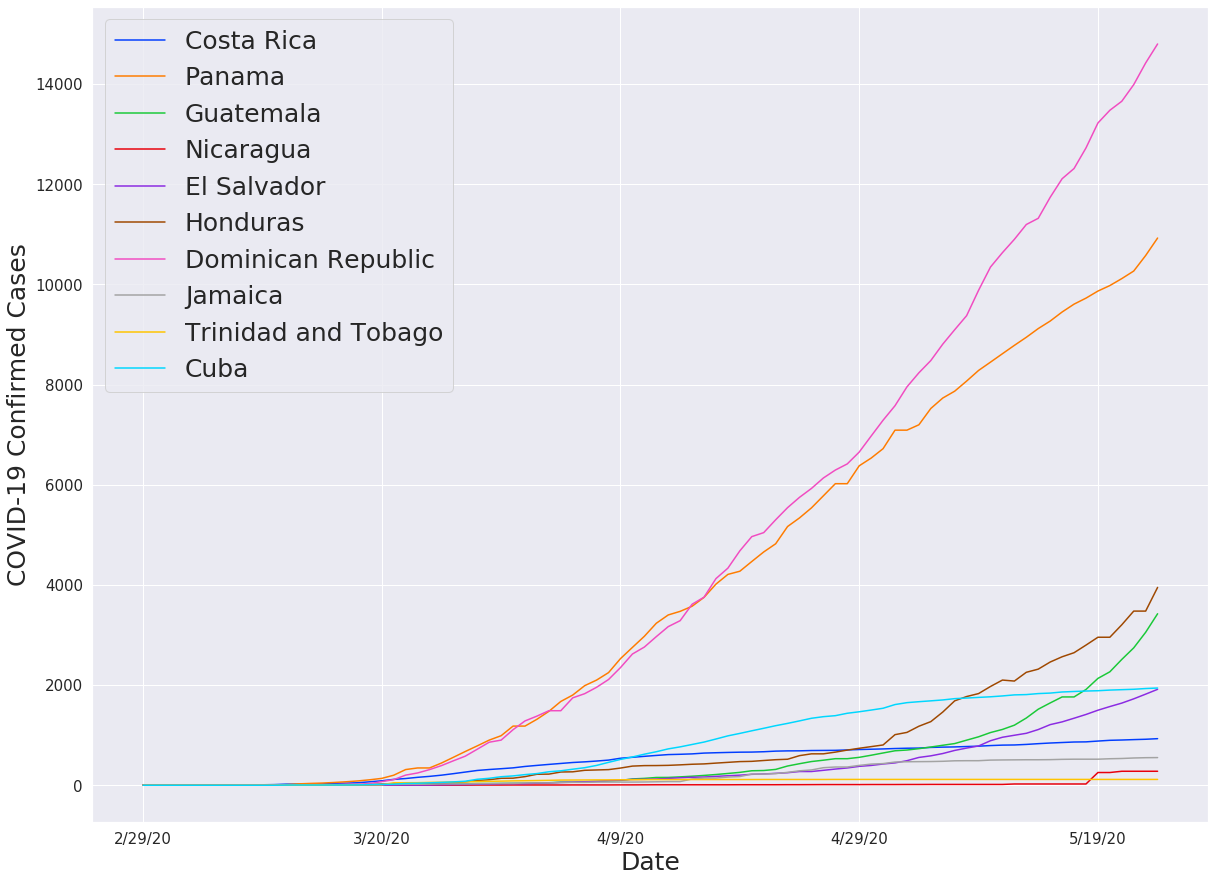

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

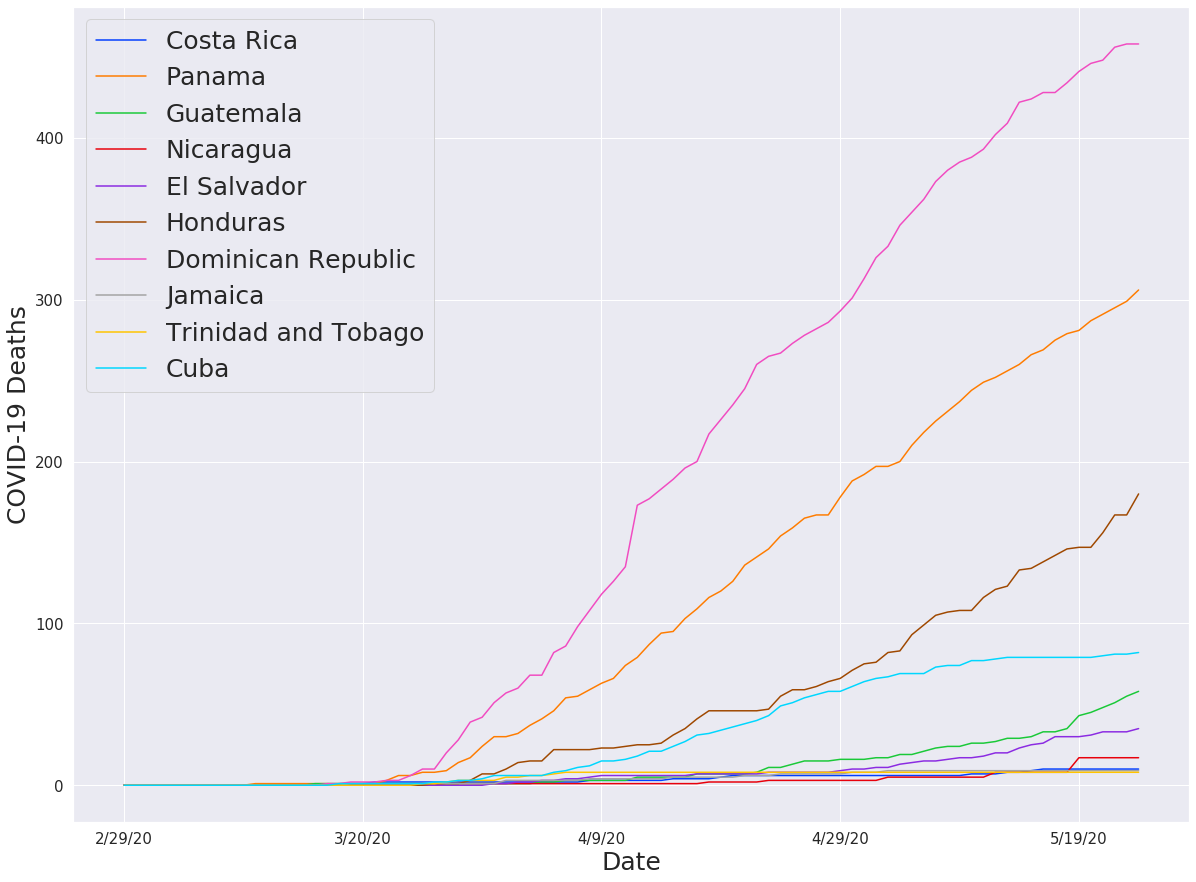

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
3/1/20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3/2/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/3/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/4/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/5/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5/20/20,15.0,110.0,132.0,0.0,73.0,0.0,254.0,9.0,0.0,13.0
5/21/20,6.0,139.0,247.0,25.0,69.0,249.0,180.0,5.0,0.0,8.0
5/22/20,8.0,151.0,231.0,0.0,85.0,273.0,332.0,10.0,0.0,8.0
5/23/20,7.0,310.0,311.0,0.0,94.0,0.0,433.0,6.0,0.0,15.0


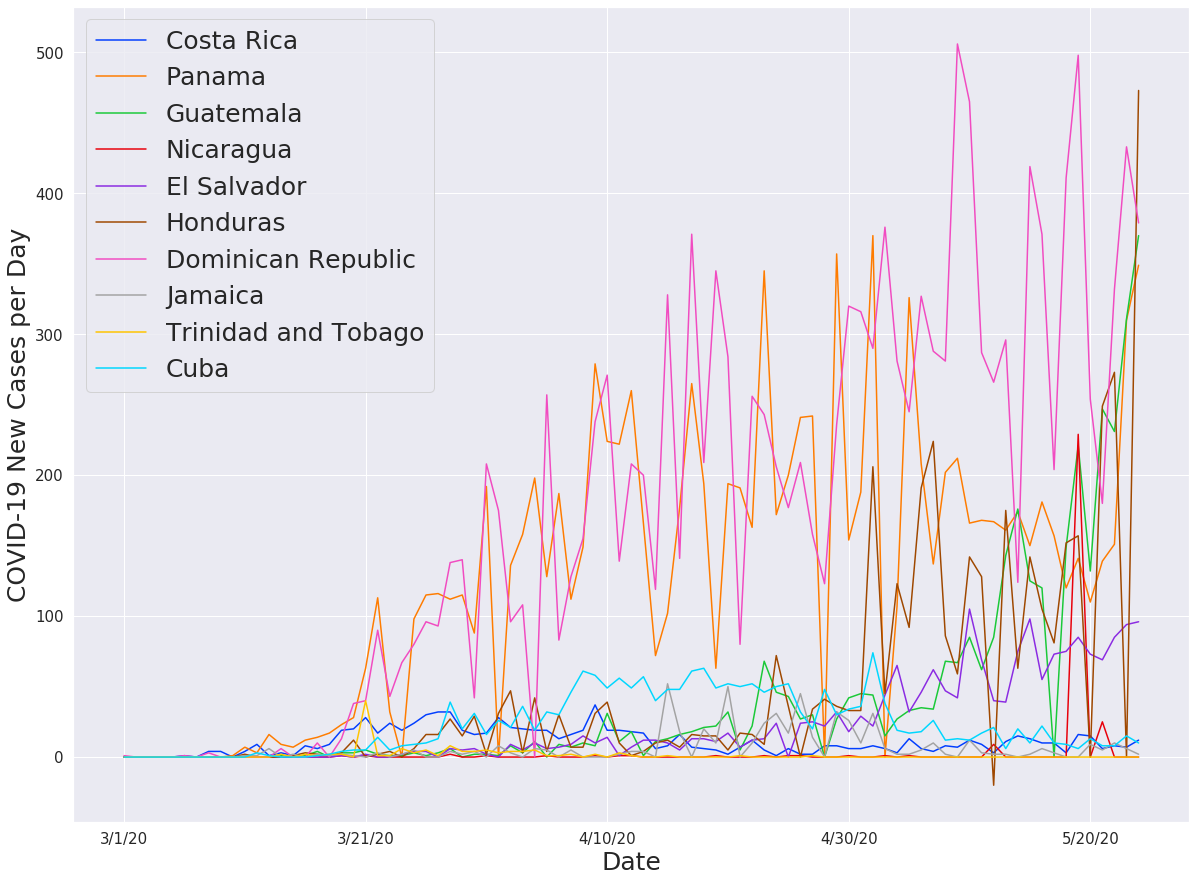

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

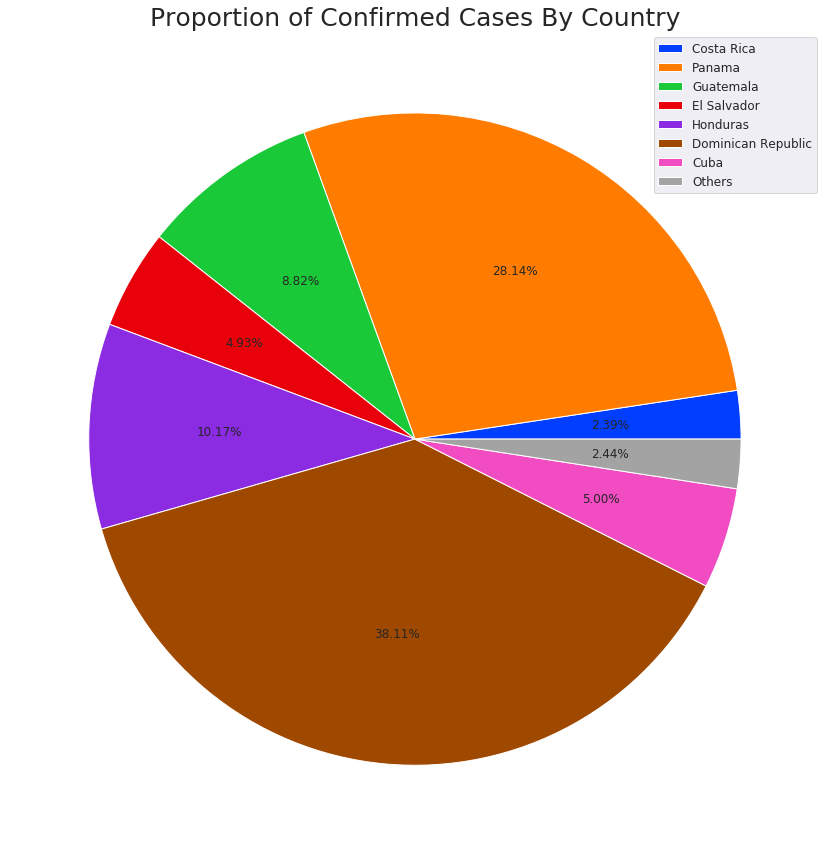

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

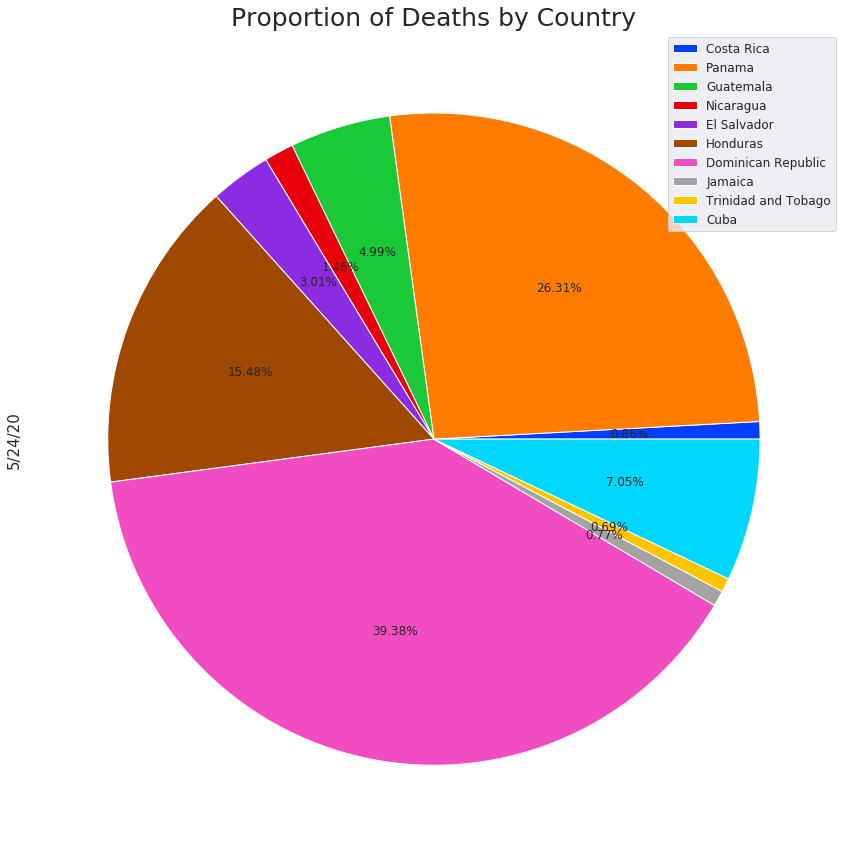

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/1/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/2/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/4/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
5/20/20,1.017007,1.011148,1.061885,1.000000,1.048732,1.000000,1.019209,1.017308,1.0,1.006889
5/21/20,1.006689,1.013932,1.109051,1.098425,1.043921,1.084264,1.013356,1.009452,1.0,1.004211
5/22/20,1.008859,1.014927,1.091959,1.000000,1.051829,1.085206,1.024310,1.018727,1.0,1.004193
5/23/20,1.007684,1.030194,1.113380,1.000000,1.054493,1.000000,1.030953,1.011029,1.0,1.007829


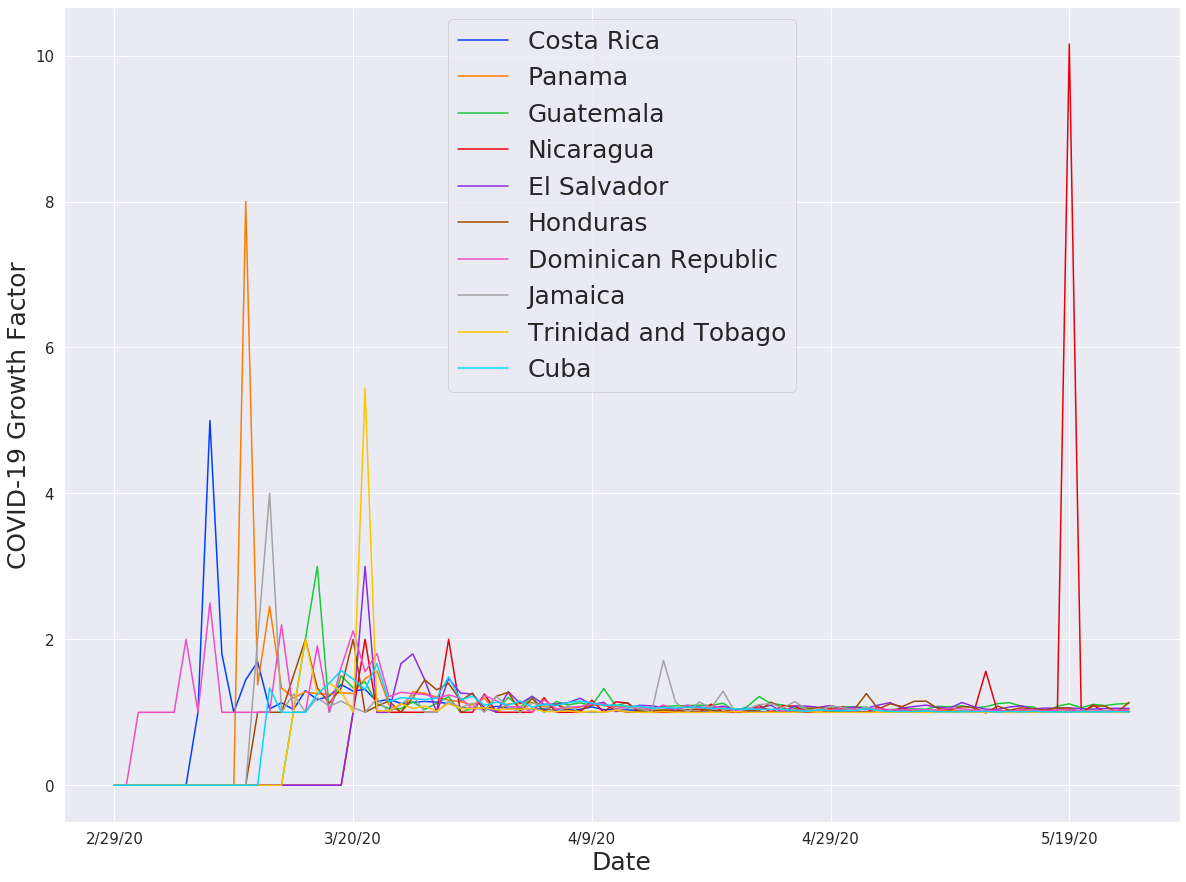

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,1.034675,1.051667,0.940412,0.922161,0.875112,0.963317,1.119509,0.961253,0.910110,0.933775
std,0.541384,0.864338,0.496309,1.116349,0.539730,0.426053,0.334342,0.519719,0.645532,0.416301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.008007,1.015432,1.009164,1.000000,1.000000,1.004458,1.020737,1.000000,1.000000,1.005227
50%,1.015524,1.039671,1.073741,1.000000,1.057131,1.042742,1.039075,1.010800,1.000000,1.029271
75%,1.054879,1.112325,1.115034,1.000000,1.095188,1.115866,1.093997,1.085489,1.013966,1.099232
max,5.000000,8.000000,3.000000,10.160000,3.000000,2.000000,2.500000,4.000000,5.444444,1.666667


In [17]:
growth_df.mean()

Costa Rica             1.034675
Panama                 1.051667
Guatemala              0.940412
Nicaragua              0.922161
El Salvador            0.875112
Honduras               0.963317
Dominican Republic     1.119509
Jamaica                0.961253
Trinidad and Tobago    0.910110
Cuba                   0.933775
dtype: float64

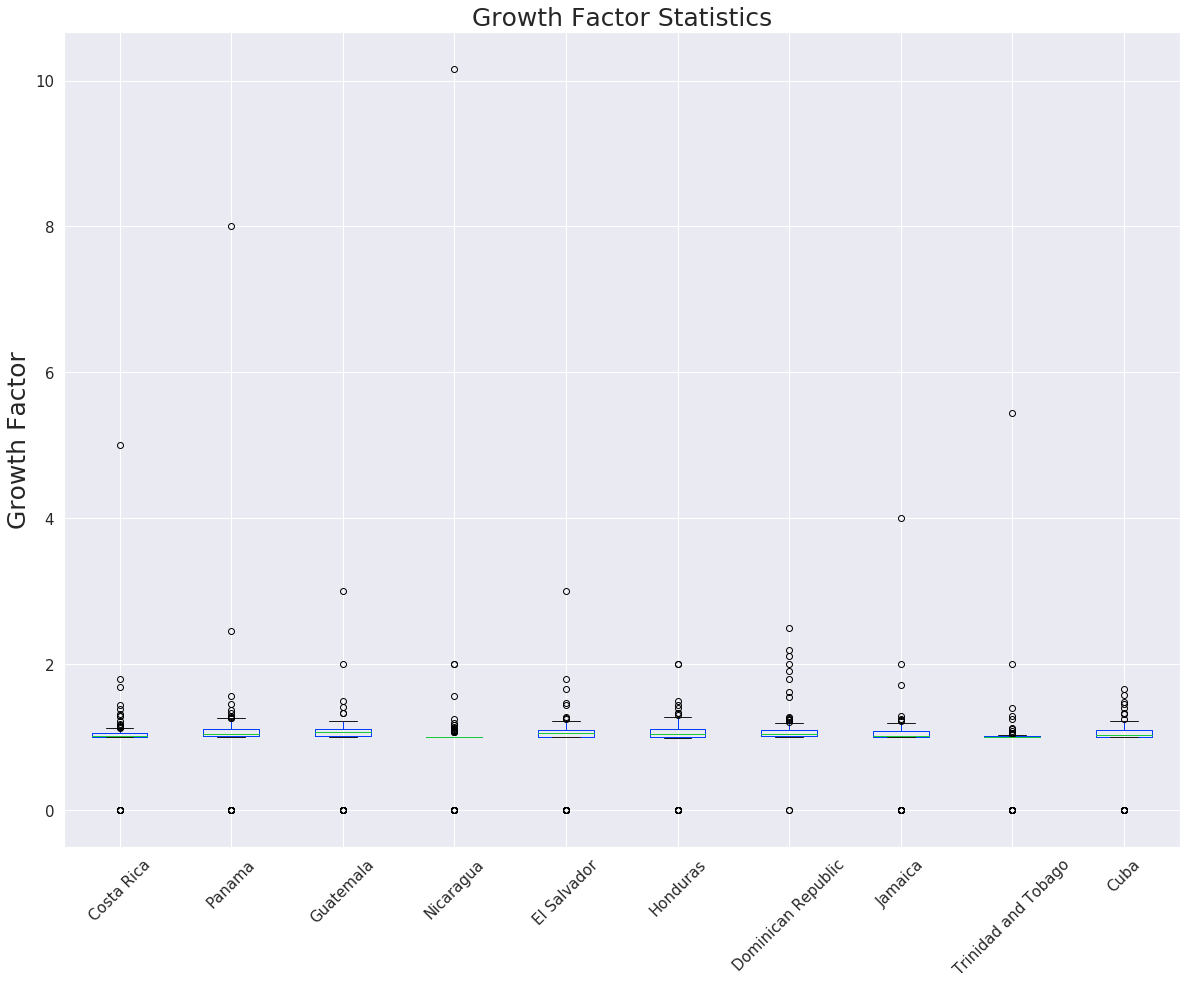

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

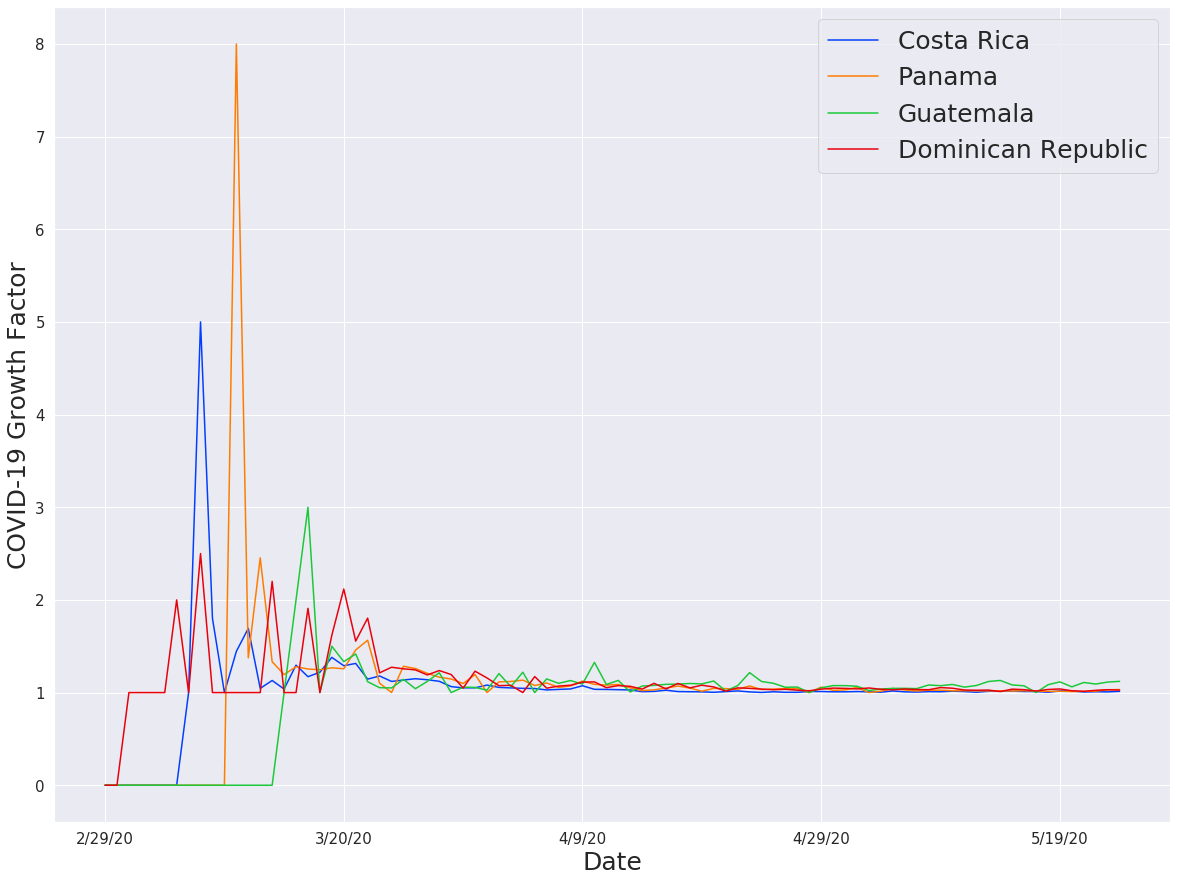

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
count,79.000000,75.000000,71.000000,66.000000,66.000000,74.000000,84.000000,74.000000,71.000000,73.000000
mean,1.126355,1.205911,1.139090,1.201603,1.140298,1.119531,1.146164,1.117132,1.102386,1.100063
std,0.463478,0.818300,0.263742,1.135230,0.271844,0.184603,0.289065,0.371466,0.539458,0.138307
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.990476,1.000000,1.000000,1.000000,1.000000
25%,1.008957,1.019965,1.054094,1.000000,1.052109,1.023915,1.024838,1.000000,1.000000,1.010682
50%,1.017937,1.048307,1.082345,1.000000,1.072871,1.055169,1.039463,1.022309,1.000000,1.048146
75%,1.069056,1.129146,1.119896,1.050000,1.107431,1.138055,1.099056,1.100838,1.020204,1.131429
max,5.000000,8.000000,3.000000,10.160000,3.000000,2.000000,2.500000,4.000000,5.444444,1.666667


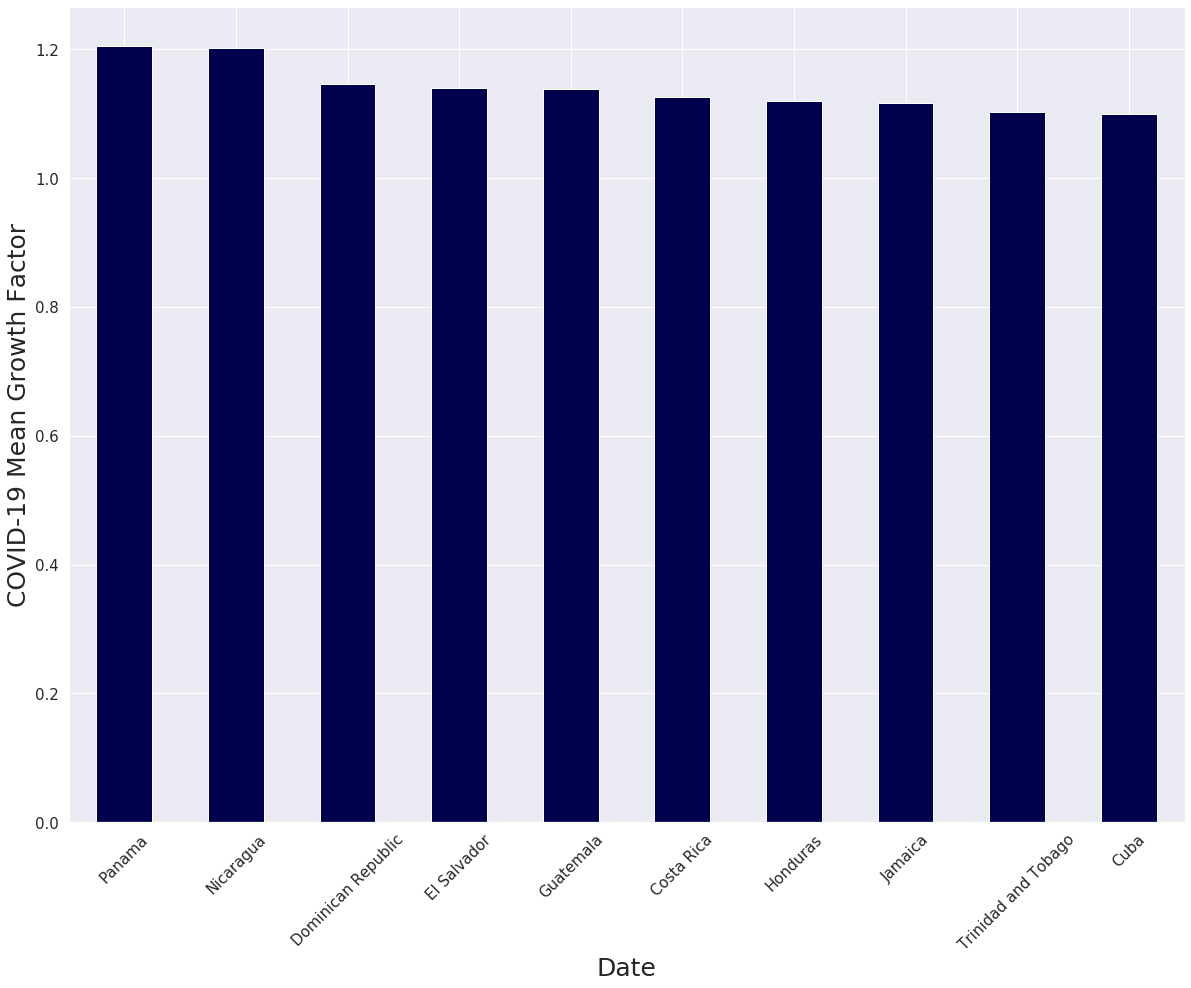

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

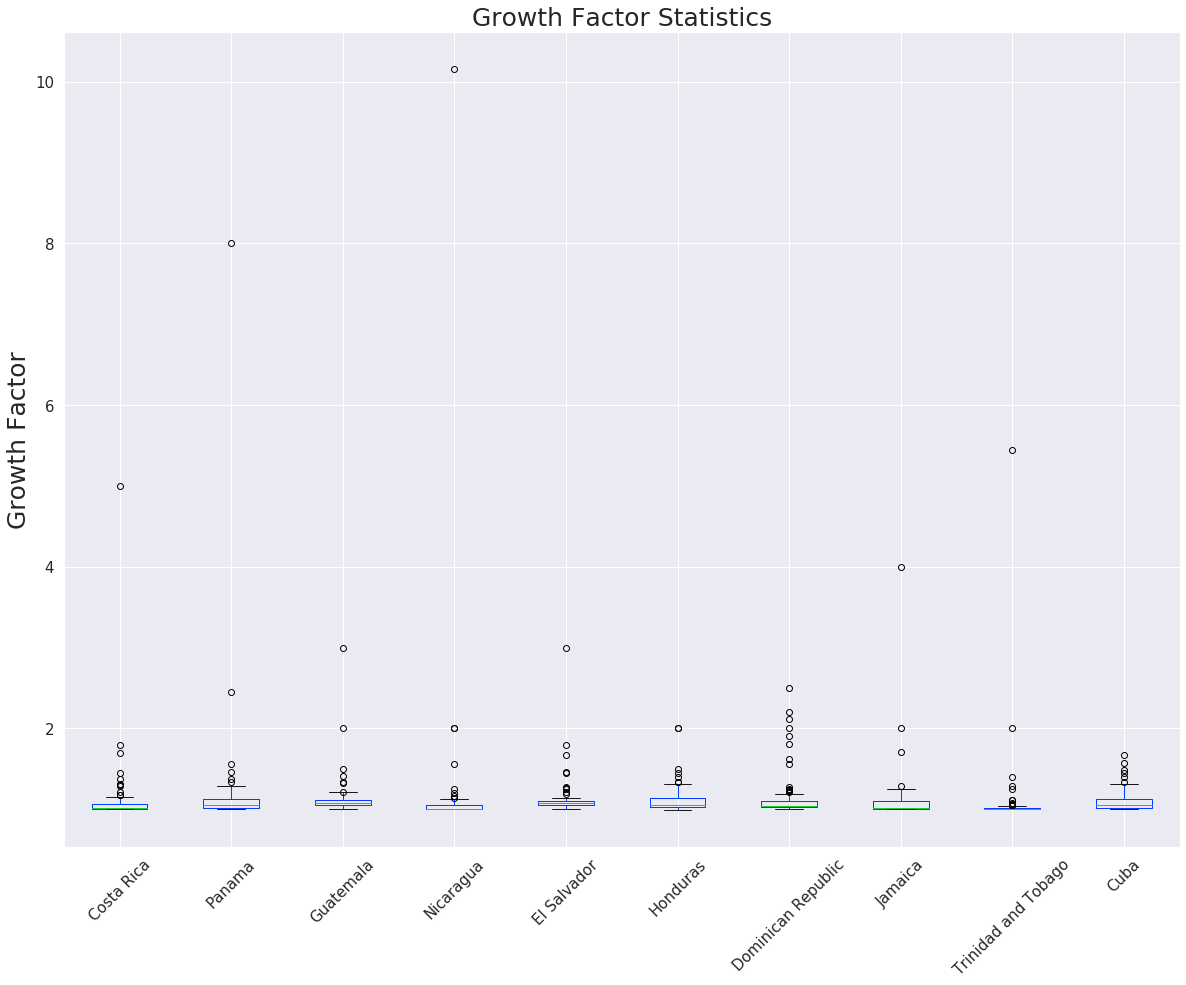

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

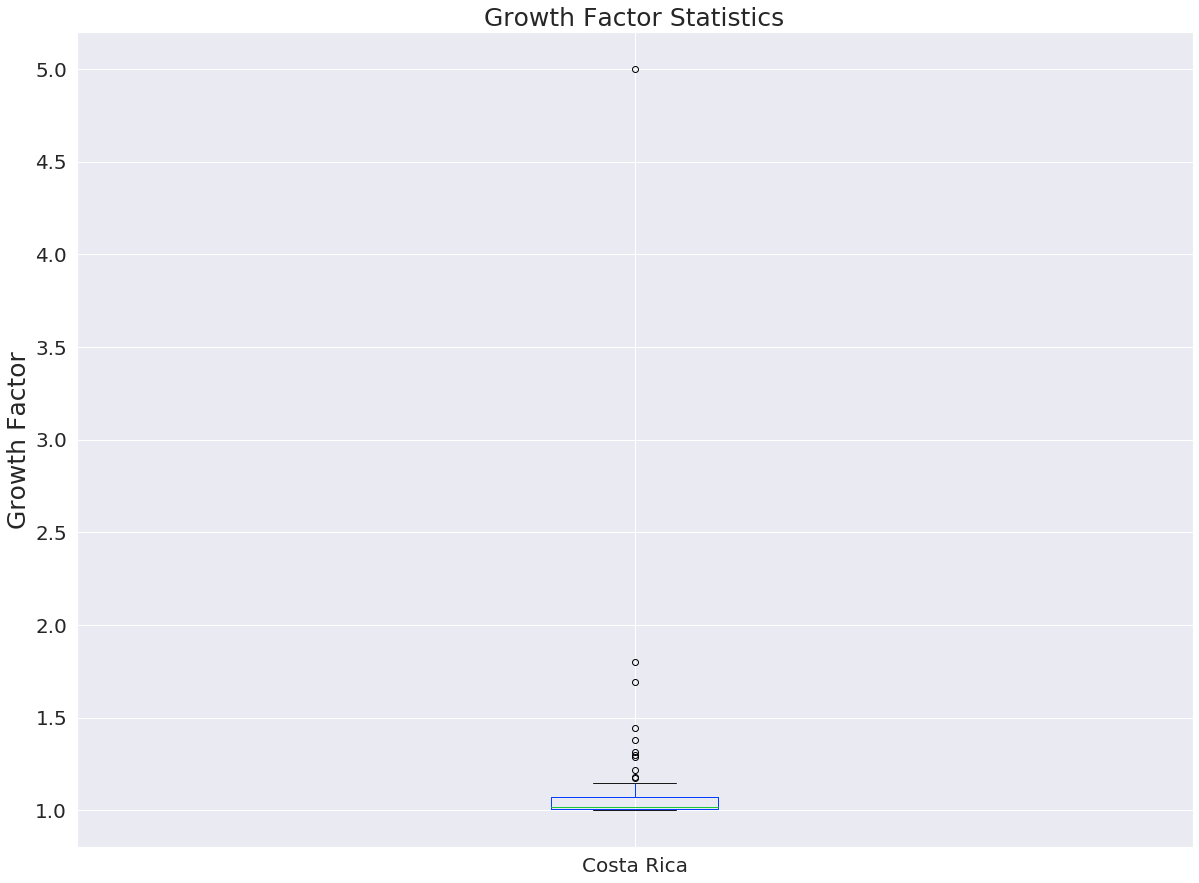

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()